In [2]:
import pandas as pd 
import seaborn as sns 
import matplotlib.pyplot as plt
import numpy as np

In [3]:
df = pd.read_csv("data-export.csv")
df.head()

,Session primary channel group (Default channel group),Date + hour (YYYYMMDDHH),Users,Sessions,Engaged sessions,Average engagement time per session,Engaged sessions per user,Events per session,Engagement rate,Event count
0,Direct,2024041623,237,300,144,47.526667,0.607595,4.673333,0.480000,1402
1,Organic Social,2024041719,208,267,132,32.097378,0.634615,4.295880,0.494382,1147
2,Direct,2024041723,188,233,115,39.939914,0.611702,4.587983,0.493562,1069
3,Organic Social,2024041718,187,256,125,32.160156,0.668449,4.078125,0.488281,1044
4,Organic Social,2024041720,175,221,112,46.918552,0.640000,4.529412,0.506787,1001


In [4]:
df.columns = df.iloc[0]
df = df.drop(index = 0).reset_index(drop= True)
df.columns = ["Channel group", "Datehour","Users", "Sessions", "Engaged Sessions","Average engagement","Engaged sessions per user","Events","Engagement rate","Event count"]

In [5]:
df.head()

,Channel group,Datehour,Users,Sessions,Engaged Sessions,Average engagement,Engaged sessions per user,Events,Engagement rate,Event count
0,Organic Social,2024041719,208,267,132,32.097378,0.634615,4.295880,0.494382,1147
1,Direct,2024041723,188,233,115,39.939914,0.611702,4.587983,0.493562,1069
2,Organic Social,2024041718,187,256,125,32.160156,0.668449,4.078125,0.488281,1044
3,Organic Social,2024041720,175,221,112,46.918552,0.640000,4.529412,0.506787,1001
4,Organic Social,2024041721,160,206,103,59.315534,0.643750,4.694175,0.500000,967


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3181 entries, 0 to 3180
Data columns (total 10 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Channel group              3181 non-null   object 
 1   Datehour                   3181 non-null   int64  
 2   Users                      3181 non-null   int64  
 3   Sessions                   3181 non-null   int64  
 4   Engaged Sessions           3181 non-null   int64  
 5   Average engagement         3181 non-null   float64
 6   Engaged sessions per user  3181 non-null   float64
 7   Events                     3181 non-null   float64
 8   Engagement rate            3181 non-null   float64
 9   Event count                3181 non-null   int64  
dtypes: float64(4), int64(5), object(1)
memory usage: 248.6+ KB


# cleaning data and data visulization for the above set 

In [8]:
df.head()

,Channel group,Datehour,Users,Sessions,Engaged Sessions,Average engagement,Engaged sessions per user,Events,Engagement rate,Event count
0,Organic Social,2024041719,208,267,132,32.097378,0.634615,4.295880,0.494382,1147
1,Direct,2024041723,188,233,115,39.939914,0.611702,4.587983,0.493562,1069
2,Organic Social,2024041718,187,256,125,32.160156,0.668449,4.078125,0.488281,1044
3,Organic Social,2024041720,175,221,112,46.918552,0.640000,4.529412,0.506787,1001
4,Organic Social,2024041721,160,206,103,59.315534,0.643750,4.694175,0.500000,967


In [9]:
df["Datehour"] = pd.to_datetime(df["Datehour"], format = "%Y%m%d%H",errors="coerce")

In [10]:
numeric_cols = df.columns.drop(["Channel group","Datehour"])
df[numeric_cols]= df[numeric_cols].apply(pd.to_numeric, errors= "coerce")
df["Hour"]= df["Datehour"].dt.hour

In [11]:
df.head()

,Channel group,Datehour,Users,Sessions,Engaged Sessions,Average engagement,Engaged sessions per user,Events,Engagement rate,Event count,Hour
0,Organic Social,2024-04-17 19:00:00,208,267,132,32.097378,0.634615,4.295880,0.494382,1147,19
1,Direct,2024-04-17 23:00:00,188,233,115,39.939914,0.611702,4.587983,0.493562,1069,23
2,Organic Social,2024-04-17 18:00:00,187,256,125,32.160156,0.668449,4.078125,0.488281,1044,18
3,Organic Social,2024-04-17 20:00:00,175,221,112,46.918552,0.640000,4.529412,0.506787,1001,20
4,Organic Social,2024-04-17 21:00:00,160,206,103,59.315534,0.643750,4.694175,0.500000,967,21


In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3181 entries, 0 to 3180
Data columns (total 11 columns):
 #   Column                     Non-Null Count  Dtype         
---  ------                     --------------  -----         
 0   Channel group              3181 non-null   object        
 1   Datehour                   3181 non-null   datetime64[ns]
 2   Users                      3181 non-null   int64         
 3   Sessions                   3181 non-null   int64         
 4   Engaged Sessions           3181 non-null   int64         
 5   Average engagement         3181 non-null   float64       
 6   Engaged sessions per user  3181 non-null   float64       
 7   Events                     3181 non-null   float64       
 8   Engagement rate            3181 non-null   float64       
 9   Event count                3181 non-null   int64         
 10  Hour                       3181 non-null   int32         
dtypes: datetime64[ns](1), float64(4), int32(1), int64(4), object(1)
memor

In [13]:
df.describe()

,Datehour,Users,Sessions,Engaged Sessions,Average engagement,Engaged sessions per user,Events,Engagement rate,Event count,Hour
count,3181,3181.000000,3181.000000,3181.000000,3181.000000,3181.000000,3181.000000,3181.000000,3181.000000,3181.000000
mean,2024-04-20 01:18:31.348632576,41.874568,51.114429,28.289217,66.650591,0.606449,4.675970,0.503404,241.907891,11.803521
min,2024-04-06 00:00:00,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,0.000000
25%,2024-04-13 02:00:00,20.000000,24.000000,13.000000,32.097378,0.561404,3.750000,0.442857,103.000000,6.000000
50%,2024-04-20 02:00:00,42.000000,51.000000,27.000000,49.040404,0.666667,4.410256,0.545455,226.000000,12.000000
75%,2024-04-26 22:00:00,60.000000,71.000000,41.000000,71.500000,0.750000,5.218182,0.633333,339.000000,18.000000
max,2024-05-03 23:00:00,208.000000,267.000000,132.000000,4525.000000,2.000000,56.000000,1.000000,1147.000000,23.000000
std,NaN,29.383942,36.661139,20.551668,127.220206,0.264064,2.795667,0.228241,183.318978,6.884907


### 1. SESSIONS AND USER OVER TIME ###
	What patterns or trends can you observe in website sessions and users over time?

In [15]:
sns.set(style="whitegrid")

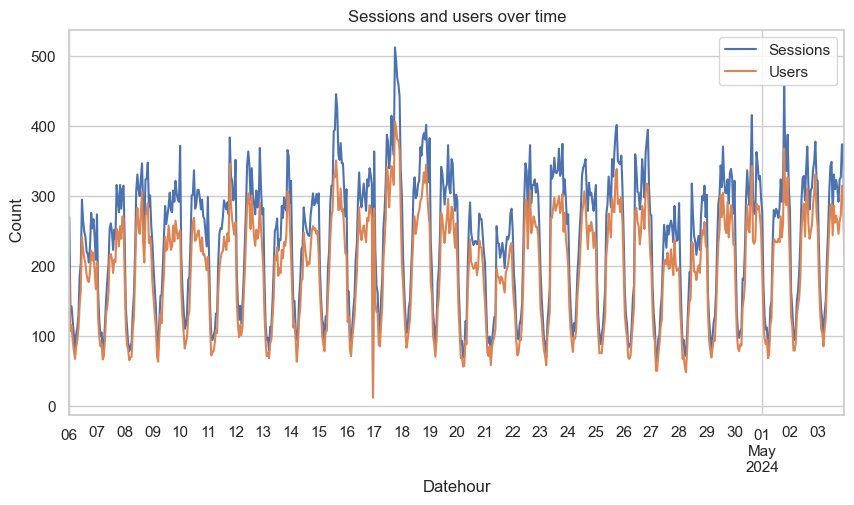

In [16]:
plt.figure(figsize=(10,5))
df.groupby("Datehour")[["Sessions", "Users"]].sum().plot(ax=plt.gca())
plt.title("Sessions and users over time")
plt.xlabel("Datehour")
plt.ylabel(" Count")
plt.show()

### 2. TOTAL USERS BY CHANNEL ###
Which marketing channel brought the highest number of users to the website, and how can we use this insight to improve traffic from other sources?



C:\Users\HP VICTUS\AppData\Local\Temp\ipykernel_7200\1233086345.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data= df , x = "Channel group", y = "Users", estimator= np.sum, palette="viridis")


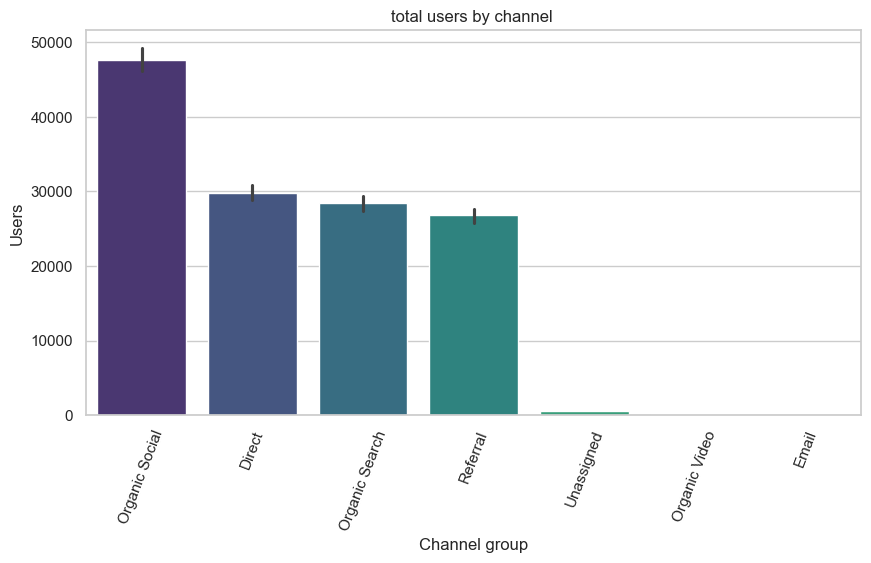

In [18]:
plt.figure(figsize=(10,5))
sns.barplot(data= df , x = "Channel group", y = "Users", estimator= np.sum, palette="viridis")
plt.title("total users by channel ")
plt.xticks(rotation=69)
plt.show()

In [19]:
df.head()

,Channel group,Datehour,Users,Sessions,Engaged Sessions,Average engagement,Engaged sessions per user,Events,Engagement rate,Event count,Hour
0,Organic Social,2024-04-17 19:00:00,208,267,132,32.097378,0.634615,4.295880,0.494382,1147,19
1,Direct,2024-04-17 23:00:00,188,233,115,39.939914,0.611702,4.587983,0.493562,1069,23
2,Organic Social,2024-04-17 18:00:00,187,256,125,32.160156,0.668449,4.078125,0.488281,1044,18
3,Organic Social,2024-04-17 20:00:00,175,221,112,46.918552,0.640000,4.529412,0.506787,1001,20
4,Organic Social,2024-04-17 21:00:00,160,206,103,59.315534,0.643750,4.694175,0.500000,967,21


### 3. AVERAGE ENGAGEMENT TIME BY CHANNEL ###
 Which channel has the highest average engagement time, and what does that tell us about user behavior and content effectiveness?


C:\Users\HP VICTUS\AppData\Local\Temp\ipykernel_7200\242258503.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=df , x = "Channel group" , y = "Average engagement", estimator= np.mean , palette="magma")


<function matplotlib.pyplot.show(close=None, block=None)>

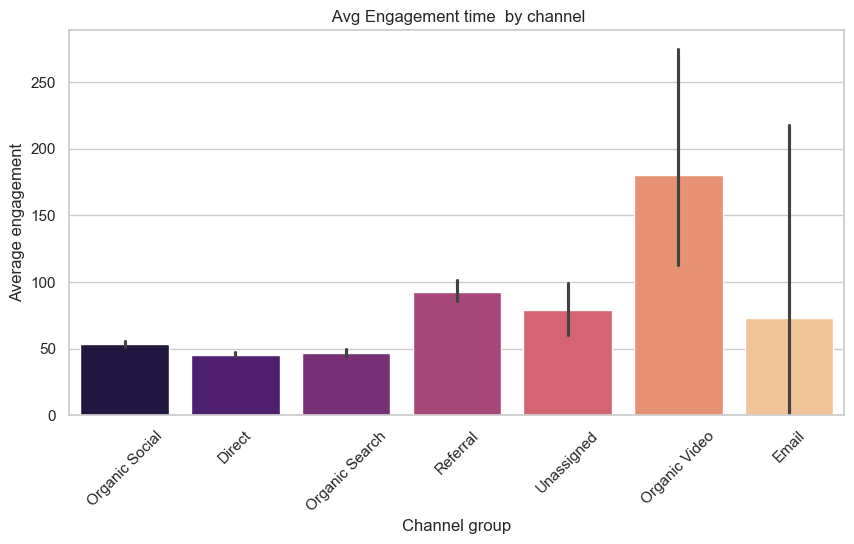

In [21]:
plt.figure(figsize=(10,5))
sns.barplot(data=df , x = "Channel group" , y = "Average engagement", estimator= np.mean , palette="magma")
plt.title(" Avg Engagement time  by channel")
plt.xticks(rotation=45)
plt.show

In [22]:
df.head()

,Channel group,Datehour,Users,Sessions,Engaged Sessions,Average engagement,Engaged sessions per user,Events,Engagement rate,Event count,Hour
0,Organic Social,2024-04-17 19:00:00,208,267,132,32.097378,0.634615,4.295880,0.494382,1147,19
1,Direct,2024-04-17 23:00:00,188,233,115,39.939914,0.611702,4.587983,0.493562,1069,23
2,Organic Social,2024-04-17 18:00:00,187,256,125,32.160156,0.668449,4.078125,0.488281,1044,18
3,Organic Social,2024-04-17 20:00:00,175,221,112,46.918552,0.640000,4.529412,0.506787,1001,20
4,Organic Social,2024-04-17 21:00:00,160,206,103,59.315534,0.643750,4.694175,0.500000,967,21


 ### 4. ENGAGEMENT  RATE DISTRIBUTION BY CHANNEL ###
	How does engagement rate vary across different traffic channels?

C:\Users\HP VICTUS\AppData\Local\Temp\ipykernel_7200\3607612880.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data = df , x = "Channel group", y= "Engagement rate",palette= "coolwarm")


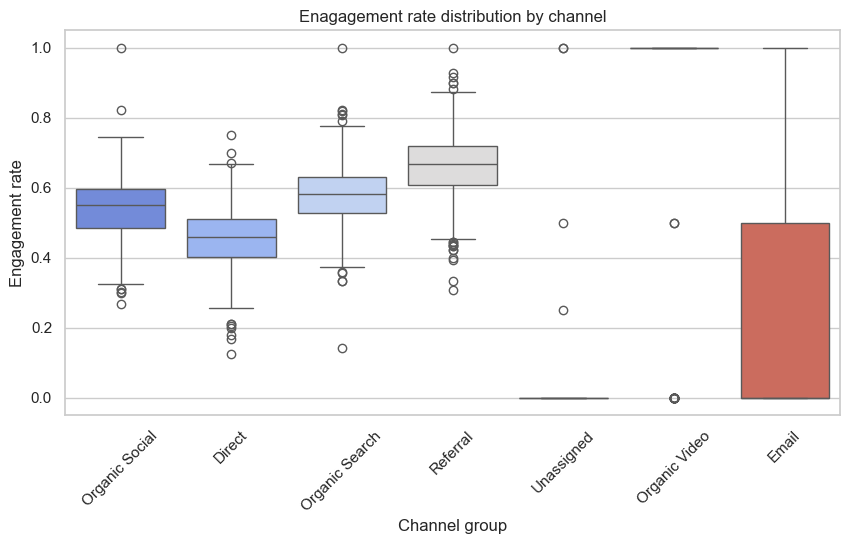

In [24]:
plt.figure(figsize=(10,5))
sns.boxplot(data = df , x = "Channel group", y= "Engagement rate",palette= "coolwarm")
plt.title("Enagagement rate distribution by channel")
plt.xticks(rotation = 45 )
plt.show()

In [25]:
df .head()

,Channel group,Datehour,Users,Sessions,Engaged Sessions,Average engagement,Engaged sessions per user,Events,Engagement rate,Event count,Hour
0,Organic Social,2024-04-17 19:00:00,208,267,132,32.097378,0.634615,4.295880,0.494382,1147,19
1,Direct,2024-04-17 23:00:00,188,233,115,39.939914,0.611702,4.587983,0.493562,1069,23
2,Organic Social,2024-04-17 18:00:00,187,256,125,32.160156,0.668449,4.078125,0.488281,1044,18
3,Organic Social,2024-04-17 20:00:00,175,221,112,46.918552,0.640000,4.529412,0.506787,1001,20
4,Organic Social,2024-04-17 21:00:00,160,206,103,59.315534,0.643750,4.694175,0.500000,967,21


### 5. ENGAGED VS NON ENGAGED ###

	Which channels are driving more engaged sessions compared to non-engaged ones, and what strategies can improve engagement in underperforming channels?

In [44]:
# Group by Channel group
Sessions_df = df.groupby("Channel group")[["Sessions", "Engaged Sessions"]].sum().reset_index()

# Create Non-Engaged column
Sessions_df["Non-Engaged"] = Sessions_df["Sessions"] - Sessions_df["Engaged Sessions"]

# Melt dataframe
Sessions_df_melted = Sessions_df.melt(
    id_vars="Channel group",   # fixed: removed trailing space
    value_vars=["Engaged Sessions", "Non-Engaged"],  # fixed: corrected spelling
    var_name="Session type",
    value_name="Count"
)

print(Sessions_df_melted.head())


    Channel group      Session type  Count
0          Direct  Engaged Sessions  17099
1           Email  Engaged Sessions      1
2  Organic Search  Engaged Sessions  19425
3  Organic Social  Engaged Sessions  32697
4   Organic Video  Engaged Sessions    109


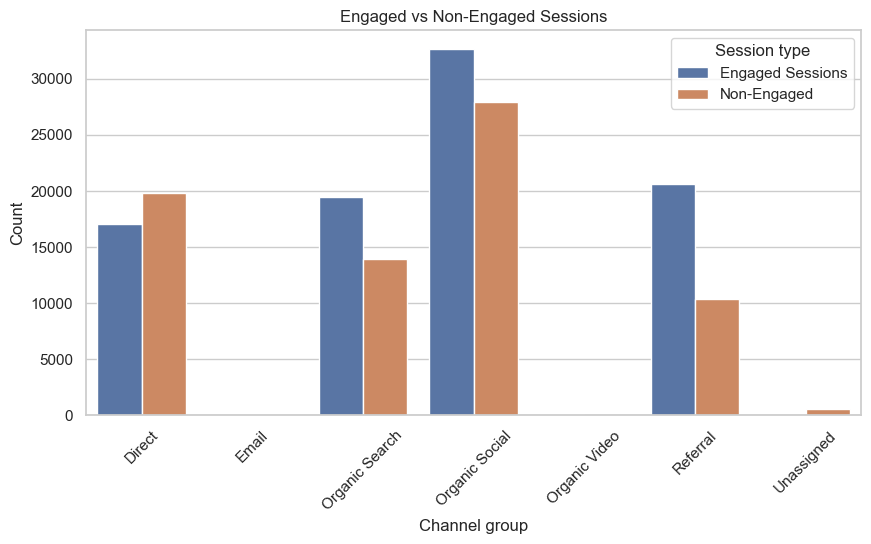

In [46]:
plt.figure(figsize=(10,5))
sns.barplot(
    data=Sessions_df_melted,
    x="Channel group",          # fixed: removed extra space
    y="Count",                  # fixed: use the correct column name from melt
    hue="Session type"          # fixed: use the column created by melt
)
plt.title("Engaged vs Non-Engaged Sessions")
plt.xticks(rotation=45)
plt.show()


### 6. Traffic by Hour Channel 
	At what hours of the day does each channel drive the most traffic?


In [47]:
df.head()

,Channel group,Datehour,Users,Sessions,Engaged Sessions,Average engagement,Engaged sessions per user,Events,Engagement rate,Event count,Hour
0,Organic Social,2024-04-17 19:00:00,208,267,132,32.097378,0.634615,4.295880,0.494382,1147,19
1,Direct,2024-04-17 23:00:00,188,233,115,39.939914,0.611702,4.587983,0.493562,1069,23
2,Organic Social,2024-04-17 18:00:00,187,256,125,32.160156,0.668449,4.078125,0.488281,1044,18
3,Organic Social,2024-04-17 20:00:00,175,221,112,46.918552,0.640000,4.529412,0.506787,1001,20
4,Organic Social,2024-04-17 21:00:00,160,206,103,59.315534,0.643750,4.694175,0.500000,967,21


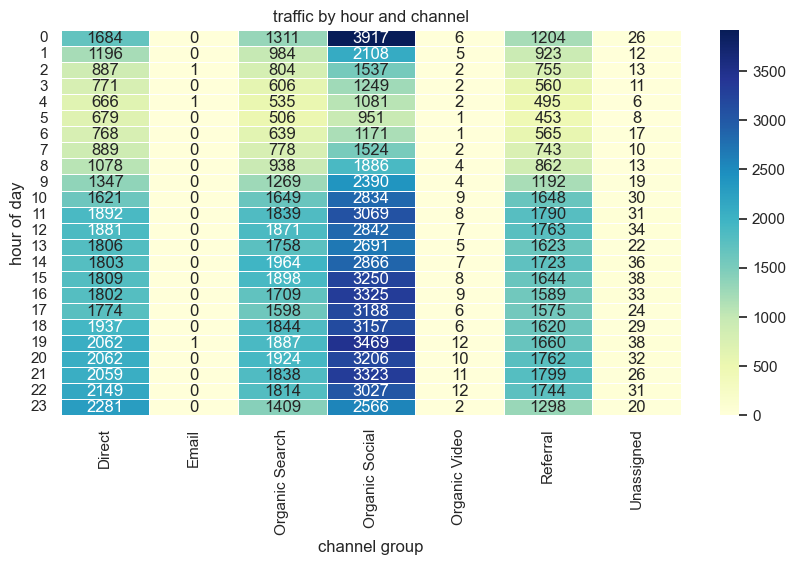

In [50]:
heatmap_data= df.groupby(["Hour", "Channel group"])["Sessions"].sum().unstack().fillna(0)

plt.figure(figsize=(10,5))
sns.heatmap(heatmap_data, cmap="YlGnBu", linewidth=.5, annot=True , fmt = ".0f")
plt.title("traffic by hour and channel")
plt.xlabel("channel group")
plt.ylabel("hour of day")
plt.show()


## 7. Enageged rate vs sessions over time ##
Is there any correlation between high traffic(sessions) and high engagement rate over the time?

In [51]:
df.head()

,Channel group,Datehour,Users,Sessions,Engaged Sessions,Average engagement,Engaged sessions per user,Events,Engagement rate,Event count,Hour
0,Organic Social,2024-04-17 19:00:00,208,267,132,32.097378,0.634615,4.295880,0.494382,1147,19
1,Direct,2024-04-17 23:00:00,188,233,115,39.939914,0.611702,4.587983,0.493562,1069,23
2,Organic Social,2024-04-17 18:00:00,187,256,125,32.160156,0.668449,4.078125,0.488281,1044,18
3,Organic Social,2024-04-17 20:00:00,175,221,112,46.918552,0.640000,4.529412,0.506787,1001,20
4,Organic Social,2024-04-17 21:00:00,160,206,103,59.315534,0.643750,4.694175,0.500000,967,21


In [64]:
df_plot = df.groupby("Datehour")[[ "Engagement rate","Sessions"]].mean().reset_index()



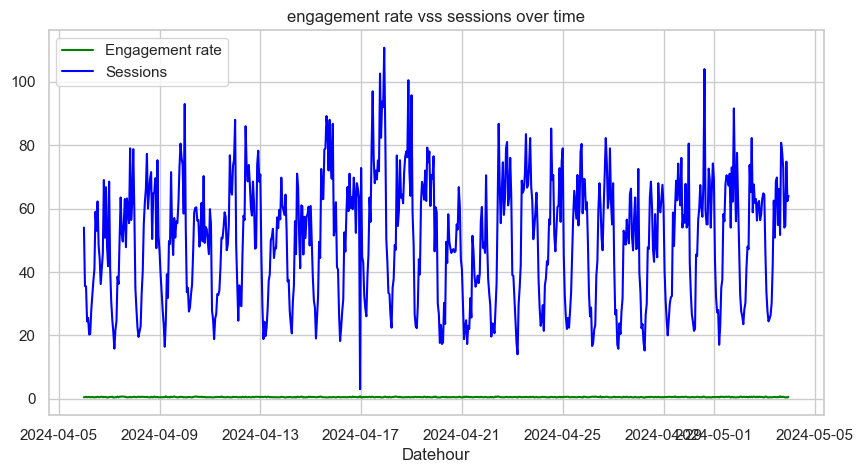

In [65]:
plt.figure(figsize=(10,5))
plt.plot(df_plot['Datehour'], df_plot["Engagement rate"], label= "Engagement rate", color="green")
plt.plot(df_plot['Datehour'], df_plot["Sessions"], label ="Sessions" , color = "blue")
plt.title("engagement rate vss sessions over time")
plt.xlabel("Datehour")
plt.legend()
plt.grid(True)
plt.show()